# Kelompok 1

1. [Adam Rafi Rezandi](https://github.com/AdamPoi) / 2141720185
2. [Andi Dwi Prastyo](https://github.com/andidprastyo) / 2141720003
3. [Bima Bayu Sapura](https://github.com/BimaBayuUWUUU) / 2141720019
4. [Lailatul Badriyah](https://github.com/lailatulbadriyah24) / 2141720036
5. [Tio Misbaqul Irawan](https://github.com/indmind) / 2141720046

## Import Library

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow
import keras

from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

## Menyiapkkan Dataset MNIST

In [20]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

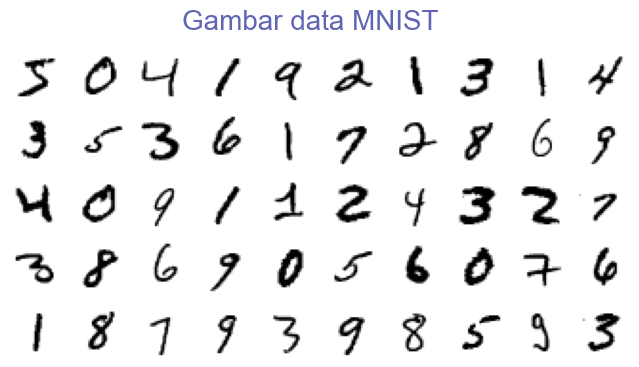

In [21]:
# Menampilkan gambar dari data MNIST
fig, ax = plt.subplots(nrows = 5, ncols = 10, figsize=(8,4), subplot_kw={'xticks': [], 'yticks': []})
for row in range(0,5):
    for col in range(0,10):
        myid = (10*row) + col # (ncols*rows) + cols

        ax[row,col].imshow( x_train[myid], cmap=plt.cm.binary ) # W,H,C
        ax[row,col].axis('off')

plt.suptitle("Gambar data MNIST", size=20, color="#6166B3")

plt.show()

## Mencetak Informasi Dataset MNIST

In [22]:
print("bentuk data: ",x_train.shape)
print("nilai max data: ",x_train[0].max())

bentuk data:  (60000, 28, 28)
nilai max data:  255


## Reshape dan Normalisasi data

In [23]:
# ubah bentuk data dan skala pixel menjadi (n,w*h)
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255

# sama juga untuk x_test
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32') / 255

print("bentuk data setelah: ",x_train.shape)
print("nilai max data setelah: ",x_train[0].max())

bentuk data setelah:  (60000, 784)
nilai max data setelah:  1.0


## Pemodelan ANN

In [24]:
# ubah bentuk label menjadi kategorical untuk digunakan tensorflow nantinya
y_train = tensorflow.keras.utils.to_categorical(y_train , num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test , num_classes=10)

In [25]:
# pembuatan hidden layer
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Input,Add,MaxPool2D,Flatten,AveragePooling2D,Dense,BatchNormalization,ZeroPadding2D,Activation,Concatenate,UpSampling2D
from tensorflow.keras.models import Model

nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(10, activation='softmax'))
print(nn_model)

In [26]:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Pelatihan dan Pengujian Dataset

In [27]:
history = nn_model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5038 - accuracy: 0.8495
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3129 - accuracy: 0.9054
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2781 - accuracy: 0.9161
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2552 - accuracy: 0.9236
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2409 - accuracy: 0.9262
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2341 - accuracy: 0.9291
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2234 - accuracy: 0.9302
Epoch 8/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2140 - accuracy: 0.9335
Epoch 9/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2106 - accuracy: 0.9344
Epoch 10/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.202

## Hasil Visualisasi Evaluasi

Akurasi terbaik: 0.9529666900634766 pada epoch: 50


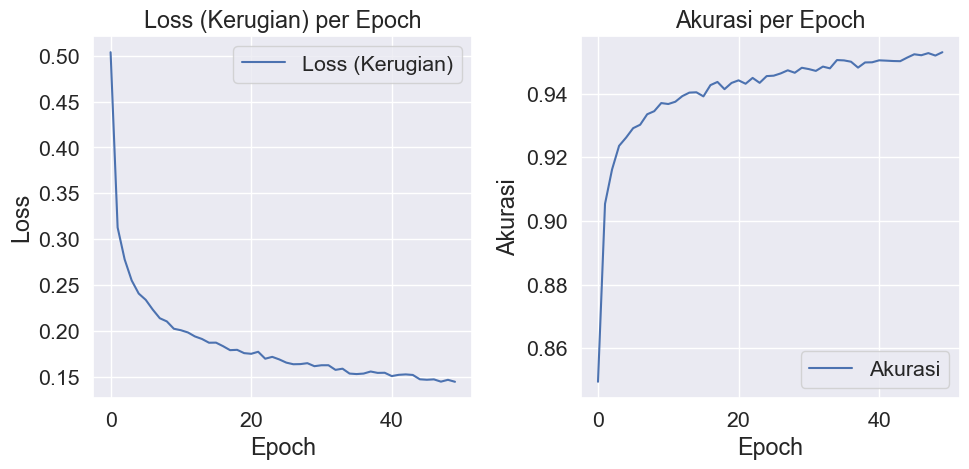

In [28]:
#Akurasi terbaik
best_accuracy = max(history.history['accuracy']) 
best_epoch = history.history['accuracy'].index(best_accuracy) + 1 
print("Akurasi terbaik:", best_accuracy, "pada epoch:", best_epoch)

# Visualisasi loss (kerugian)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss (Kerugian)')
plt.title('Loss (Kerugian) per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Visualisasi akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Akurasi')
plt.title('Akurasi per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.tight_layout()
plt.show()

## Confusion Matrix

In [29]:
# Menghitung akurasi model pada data pengujian menggunakan prediksi yang dihasilkan sebelumnya
y_prob = nn_model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

313/313 [==============================] - 0s 844us/step


0.9658

In [30]:
# Menghitung confusion matrix berdasarkan label sebenarnya (y_test) dan label prediksi (y_pred)
from sklearn.metrics import confusion_matrix  # for evaluating results
confusion_array = confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion_array

array([[ 962,    0,    2,    2,    0,    3,    6,    2,    2,    1],
       [   0, 1120,    5,    0,    0,    1,    2,    1,    6,    0],
       [   2,    2, 1004,    1,    1,    1,    1,   12,    8,    0],
       [   1,    1,   11,  968,    0,   11,    0,    9,    5,    4],
       [   1,    0,    6,    0,  942,    0,    6,    4,    3,   20],
       [   2,    0,    1,   13,    2,  859,    5,    2,    5,    3],
       [  10,    3,    6,    0,    5,    8,  922,    0,    4,    0],
       [   2,    5,   11,    2,    2,    0,    0,  999,    2,    5],
       [   7,    5,    5,    4,    6,   11,    2,    8,  924,    2],
       [   4,    4,    0,    7,   13,   11,    0,    9,    3,  958]],
      dtype=int64)

<Axes: >

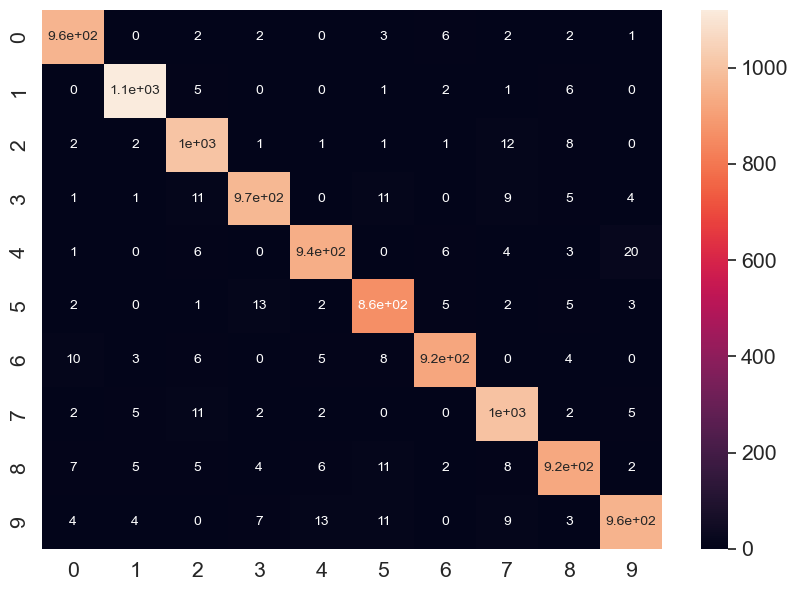

In [31]:
# Membuat visualisasi Confusion Matrix
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(confusion_array, range(10), range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size